<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0J6EEN1429-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Looking for a data validation libraries? Try Great Expectations in python**


Estimated time needed: **30** minutes


## __Table of Contents__

<ol>
    <li><a href="#Objectives">Objectives</a></li>
    <li>
        <a href="#Setup">Setup</a>
        <ol>
            <li><a href="#Installing-Required-Libraries">Installing Required Libraries</a></li>
            <li><a href="#Importing-Required-Libraries">Importing Required Libraries</a></li>
            <li><a href="#Defining-Helper-Functions">Defining Helper Functions</a></li>
            <li><a href="#Importing-bank-churn-dataset">Importing bank churn dataset</a></li>
        </ol>
    </li>
    <li>
        <a href="#Great-Expectations-example:-Bank-churn-dataset-check">Great Expectations example: Bank churn dataset check</a>
        <ol>
            <li><a href="#1.-csv-dataset-read-in-Great-Expectations">csv dataset read in Great Expectations</a></li>
            <li><a href="#2.-Exist-or-not">Exist or not</a></li>
            <li><a href="#3.-Simple-content">Simple content</a></li>
            <li><a href="#4.-Be-in-set">Be in set</a></li>
            <li><a href="#5.-Value-ratios">Value ratios</a></li>
            <li><a href="#6.-Number-&-mostly">Number & mostly</a></li>
            <li><a href="#7.-Statistic-information">Statistic information</a></li>
            <li><a href="#8.-Combined-expectations-suite-&-future-data-validation">Combined expectations suite & future data validation</a></li>
        </ol>
    </li>
</ol>

<a href="#Exercises">Exercises</a>
<ol>
    <li><a href="#Exercise-1---To-be-in-set">Exercise 1. To be in set</a></li>
    <li><a href="#Exercise-2---Mostly">Exercise 2. Mostly</a></li>
    <li><a href="#Exercise-3---In-between">Exercise 3. In between</a></li>
</ol>


## Objectives

After completing this lab you will be able to:

 - Understand how the funtions of DataFrame in `Great expectations`.
 - Know some common needs in data validation.
 - Set up data validation contents in `Great expectations` to ***do data validation*** before machine learning modeling.
 - Build and use suite in `Great expectations` to build a ***data validation pipeline***.


----


## Setup


For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for machine learning and machine-learning-pipeline related functions.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.
*   [`Great Expectations`](https://greatexpectations.io/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0J6EEN1429-2022-01-01) for checking the quality of your dataset


### Installing Required Libraries

The following required libraries are pre-installed in the [`Skills Network Labs`](https://skills.network/lab-tools?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0J6EEN1429-2022-01-01) environment. However, if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda), you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


In [1]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
!mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

Could not solve for environment specs
The following packages are incompatible
├─ matplotlib 3.5.0  is installable with the potential options
│  ├─ matplotlib [2.2.2|3.1.2|...|3.5.3] would require
│  │  └─ pyqt [ |>=5.6,<6.0a0 ] with the potential options
│  │     ├─ pyqt 5.6.0 would require
│  │     │  └─ qt 5.6.*  with the potential options
│  │     │     ├─ qt 5.6.2 would require
│  │     │     │  ├─ gst-plugins-base >=1.12.2,<1.13.0a0 , which requires
│  │     │     │  │  └─ gstreamer [>=1.12.2,<1.13.0a0 |>=1.12.4,<1.13.0a0 ], which requires
│  │     │     │  │     └─ glib >=2.53.6,<3.0a0 , which can be installed;
│  │     │     │  └─ openssl 1.0.* , which can be installed;
│  │     │     ├─ qt 5.6.2 would require
│  │     │     │  ├─ glib >=2.53.6,<3.0a0 , which can be installed;
│  │     │     │  └─ openssl >=1.0.2n,<1.0.3a , which can be installed;
│  │     │     ├─ qt 5.6.3 would require
│  │     │     │  ├─ glib >=2.56.1,<3.0a0 , which can be installed;
│  │     │     │  └─ ope

The [`Great Expectations`](https://greatexpectations.io/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0J6EEN1429-2022-01-01) are __not__ pre-installed in the [`Skills Network Labs`](https://skills.network/lab-tools?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0J6EEN1429-2022-01-01) environment. __You will need to run the following cell__ to install them:


In [2]:
%%capture
!pip install great_expectations

### Importing Required Libraries

_We recommend you import all required libraries in one place:_


In [3]:
import great_expectations as gx
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_digits, load_wine

# You can also use this section to suppress warnings generated by your code:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

sns.set_context('notebook')
sns.set_style('white')

### Defining Helper Functions

_Here is the plotter function to help visualize any data in helping the notebook's code readability:_


In [4]:
# This function will allow us to easily plot data taking in x values, y values, and a title
def plotter(x, y, title):
    plt.plot(x, y)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(title)
    plt.show()

### Importing bank churn dataset using Pandas

_We need our dataset. The dataset is about **bank churn and customer information** and is saved in [`Skills Network Labs`](https://skills.network/lab-tools?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0J6EEN1429-2022-01-01)'s cloud object storage. We are using the following code to import our data as a **.csv** file:_

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0J6EEN/images/analysis_analytics_business_chart_charts_computer_concept_data-1366141.jpg%21d.jpeg" width="40%">


In [5]:
df_pandas = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0J6EEN/Dataset_original.csv')
df_pandas.to_csv('Dataset_original.csv')

----


## Great Expectations example: Bank churn dataset check


### Reading the CSV dataset using Great Expectations library

The Great Expectations's library has its own `read_csv` API and other functions that are similar to the ones commonly used in `Pandas`.

Our imported `.csv` bank churn file is read in Great Expectations here:


In [6]:
df = gx.read_csv('Dataset_original.csv')
df.head()

,Unnamed: 0,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Or you can directly import the dataset from link:


In [ ]:
df = gx.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0J6EEN/Dataset_original.csv')
df.head()

In [7]:
df.shape

(9000, 15)

In [8]:
type(df)

great_expectations.dataset.pandas_dataset.PandasDataset

The dataset is saved in the `great_expectations.dataset.pandas_dataset.PandasDataset` format in `Great Expectations`. We will call `df.<function>` to check the data quality.


### Check One - Exists or not

Let's check if a  column & content **exist or not**; making sure that our model target in the customer churn model: **"Exited"** exists.

Column **'Exited'** exists:


In [9]:
out = df.expect_column_to_exist('Exited')
out

{
  "result": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  },
  "meta": {},
  "success": true
}

This will raise an exception if the column does not exist in the DataFrame, stopping the execution of the code. The output is of type <a href= "https://docs.greatexpectations.io/docs/terms/validation_result/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0J6EEN1429-2022-01-01#:~:text=A%20Validation%20Result%20is%20an,of%20verifiable%20assertions%20about%20data"> Validation Result </a> essentially a dictionary.


In [10]:
type(out)

great_expectations.core.expectation_validation_result.ExpectationValidationResult

In general, the output has the following attributes:


```success```: A true or false indicator of whether the Expectation passed.

```result```: The observed values generated when the Expectation was run.

```meta```: Provides additional information about the Validation Result of some Expectations.

```exception_info```: This is a dictionary with three keys.

```raised_exception``` indicates if an exception was raised during the Validation

```exception_traceback``` contains the traceback of the raised exception, if an exception was raised.

```exception_message ``` contains the message associated with the raised exception, if an exception was raised


The key ```success``` is the key we are interested in:


In [11]:
out["success"]
##or using out.success

True

If the column does not exist, we get the following result:


In [12]:
out = df.expect_column_to_exist('not exist')
out["success"]

False

We can also check whether or not the column **"Exited"** has null values, using the method ```expect_column_values_to_not_be_null()```. This method checks if a specific column of a DataFrame have null values. This method can be useful for ensuring that important data is present and not missing from your dataset.


In [13]:
df.expect_column_values_to_not_be_null('Exited')

{
  "result": {
    "element_count": 9000,
    "unexpected_count": 0,
    "unexpected_percent": 0.0,
    "unexpected_percent_total": 0.0,
    "partial_unexpected_list": []
  },
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  },
  "meta": {},
  "success": true
}

Very good! You know understand how to use the very basic checking function of Great Expectations.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0J6EEN/images/thumb_favorite_hand_arm_handle_hand_tool_equal_like-941135.jpg%21d.jpeg" width="30%">


### Check Two - Simple content

We need to make sure the **format** of the content in a column is correct. 

For example, **'Surname'** need to be **strings**:


In [14]:
out = df.expect_column_values_to_be_of_type('Surname', 'str')
out

{
  "result": {
    "element_count": 9000,
    "missing_count": 0,
    "missing_percent": 0.0,
    "unexpected_count": 0,
    "unexpected_percent": 0.0,
    "unexpected_percent_total": 0.0,
    "unexpected_percent_nonmissing": 0.0,
    "partial_unexpected_list": []
  },
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  },
  "meta": {},
  "success": true
}

Moreover, if we'd like to check if the **'Surname'** column entries are strings that match a given **regular expression**:


In [15]:
out = df.expect_column_values_to_match_regex('Surname', '[A-Z][a-z]')
out

{
  "result": {
    "element_count": 9000,
    "missing_count": 0,
    "missing_percent": 0.0,
    "unexpected_count": 135,
    "unexpected_percent": 1.5,
    "unexpected_percent_total": 1.5,
    "unexpected_percent_nonmissing": 1.5,
    "partial_unexpected_list": [
      "H?",
      "T'ien",
      "T'ang",
      "T'ang",
      "T'ao",
      "K'ung",
      "L?",
      "K'ung",
      "T'ang",
      "K'ung",
      "P'an",
      "P'eng",
      "T'ien",
      "Y?an",
      "L?",
      "Y?an",
      "L?",
      "H?",
      "T'an",
      "T'ao"
    ]
  },
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  },
  "meta": {},
  "success": false
}

In [16]:
out["success"]

False

Unlike the expectations above, some of the content **failed** the test, as some of the data has **not only letters** but some irregular **symbols** in their names. We can see the examples in ``` partial_unexpected_list```, for example:  ```Y?an```


In [17]:
df[df['Surname']=='Y?an']

,Unnamed: 0,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
941,941,942,15676521,Y?an,696,France,Female,31,8,0.00,2,0,0,191074.11,0
977,977,978,15582616,Y?an,520,France,Female,38,4,0.00,2,1,0,56388.63,0
2300,2300,2301,15647266,Y?an,651,Spain,Female,45,10,135923.16,1,1,0,18732.84,0
5868,5868,5869,15663817,Y?an,713,France,Male,46,5,0.00,1,1,1,55701.62,0
6020,6020,6021,15781234,Y?an,609,France,Female,35,2,147900.43,1,1,0,140000.29,0
6030,6030,6031,15581388,Y?an,487,Spain,Male,33,8,145729.71,1,1,0,41365.85,0
7143,7143,7144,15761158,Y?an,719,France,Female,54,7,0.00,2,1,1,125041.52,0
7869,7869,7870,15693771,Y?an,651,Spain,Female,45,8,95922.90,1,1,0,84782.42,1
8170,8170,8171,15641366,Y?an,599,Germany,Male,61,1,124737.96,1,0,1,90389.61,1
8388,8388,8389,15806570,Y?an,763,France,Female,53,4,0.00,1,1,0,77203.72,1


### Check Three - Be in set

If we want to see if the **values of a column** are from a specific list of values, we can use the **be in set method** from Great Expectations.

Check if numbers in **'HasCrCard'** consist of binary values **0,1**:


In [18]:
df.expect_column_values_to_be_in_set('HasCrCard', [0, 1])

{
  "result": {
    "element_count": 9000,
    "missing_count": 0,
    "missing_percent": 0.0,
    "unexpected_count": 0,
    "unexpected_percent": 0.0,
    "unexpected_percent_total": 0.0,
    "unexpected_percent_nonmissing": 0.0,
    "partial_unexpected_list": []
  },
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  },
  "meta": {},
  "success": true
}

Values could also be strings, values in the column **'Geography'** are **Spain, Germany, or France**:


In [19]:
df.expect_column_distinct_values_to_be_in_set("Geography",['Spain','Germany','France'])

{
  "result": {
    "observed_value": [
      "France",
      "Germany",
      "Spain"
    ],
    "element_count": 9000,
    "missing_count": null,
    "missing_percent": null
  },
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  },
  "meta": {},
  "success": true
}

You can also use some of `pandas` Dataframe's functions in `Great Expectations`. For example, `.value_count`:


In [20]:
df['Geography'].value_counts()

France     4498
Spain      2253
Germany    2249
Name: Geography, dtype: int64

Plot out the geographic result:


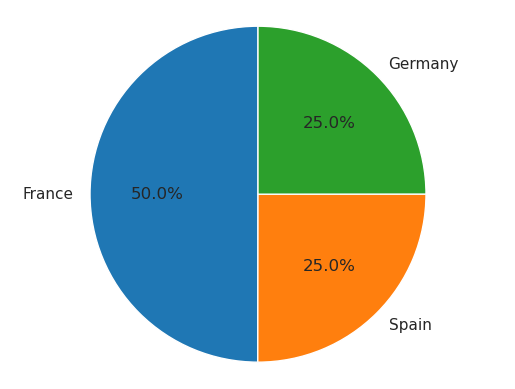

In [21]:
plt.pie(df['Geography'].value_counts(),labels=df['Geography'].unique(), startangle=90, autopct='%1.1f%%')

plt.axis('equal')

plt.show()

Similarly, we can call `.plot` to plot it in a *bar figure* directly for the `Great Expectaions` read **Dataset**.


<AxesSubplot:>

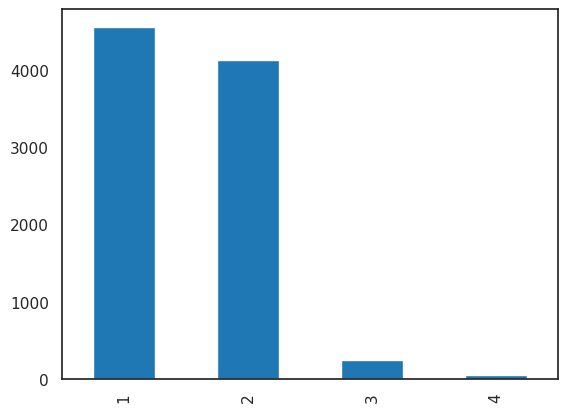

In [22]:
df['NumOfProducts'].value_counts().plot(kind='bar')

### Check Four - Value ratios

Other than just checking the data format in a column, `Great Expectations` could check the value **occurrence ratio**.

For example, here we want the sample to have 50/50 gender distributions. With the *[Kullback–Leibler divergence](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0J6EEN1429-2022-01-01)* less than 0.1:


In [23]:
partition_object = {
    'values': ['Male', 'Female'],
    'weights': [0.5, 0.5],
    
}
df.expect_column_kl_divergence_to_be_less_than('Gender', partition_object, 0.1)

{
  "result": {
    "observed_value": 0.0038966441612041727,
    "element_count": 9000,
    "missing_count": null,
    "missing_percent": null
  },
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  },
  "meta": {},
  "success": true
}

You can use the following sentence to conveniently create **weights from categorical data**:


In [24]:
sex_partition = gx.dataset.util.categorical_partition_data(df['Gender'])
sex_partition

{'values': ['Male', 'Female'], 'weights': array([0.54411111, 0.45588889])}

Moreover, you can check whether column values is has a similar **distribution** to the **provided categorical partition**. 

Here in the example, the expectation compares categorical distributions using a **Chi-squared test**. 

It returns **success=True** if values in the column **match** the distribution of the provided partition.


In [25]:
df.expect_column_chisquare_test_p_value_to_be_greater_than('Gender', sex_partition)

{
  "result": {
    "observed_value": 1.0,
    "element_count": 9000,
    "missing_count": null,
    "missing_percent": null
  },
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  },
  "meta": {},
  "success": true
}

**Well done! You are halfway done with the project.
Thanks for your effort in working on it. Let's continue!**


<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0J6EEN/images/man_person_power_strength_strong_fitness_body_muscles-641586.jpg%21d.jpeg" width="40%">


### Check Five - Number & mostly

Let's look at the distribution of the number value column, **'Age'**:


(array([ 556., 1950., 3248., 1701.,  753.,  472.,  189.,  113.,   14.,
           4.]),
 array([18. , 25.4, 32.8, 40.2, 47.6, 55. , 62.4, 69.8, 77.2, 84.6, 92. ]),
 <BarContainer object of 10 artists>)

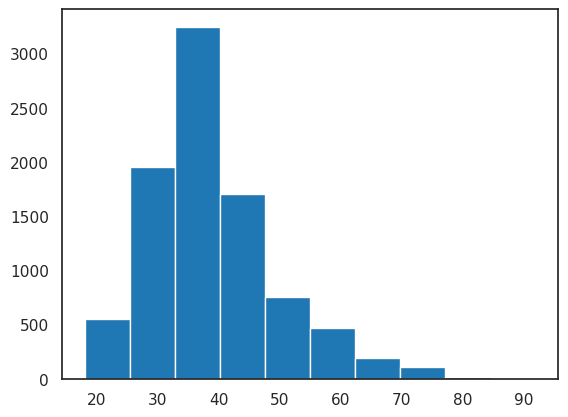

In [26]:
plt.hist(df['Age'])

We can set an expectation for the number range, for example the expectation here is that if 'Age' is in the range of 18-85:


In [27]:
out = df.expect_column_values_to_be_between('Age', min_value=18, max_value=85)
out

{
  "result": {
    "element_count": 9000,
    "missing_count": 0,
    "missing_percent": 0.0,
    "unexpected_count": 3,
    "unexpected_percent": 0.03333333333333333,
    "unexpected_percent_total": 0.03333333333333333,
    "unexpected_percent_nonmissing": 0.03333333333333333,
    "partial_unexpected_list": [
      88,
      92,
      92
    ]
  },
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  },
  "meta": {},
  "success": false
}

In [28]:
out["success"]

False

The expectation **fails**, because there are many old people in the dataset.

To ignore some of the outliers, you could use **'mostly'** in `Great Expectations`:


In [29]:
out_new=df.expect_column_values_to_be_between('Age', min_value=18, max_value=85, mostly=0.99)
out_new

{
  "result": {
    "element_count": 9000,
    "missing_count": 0,
    "missing_percent": 0.0,
    "unexpected_count": 3,
    "unexpected_percent": 0.03333333333333333,
    "unexpected_percent_total": 0.03333333333333333,
    "unexpected_percent_nonmissing": 0.03333333333333333,
    "partial_unexpected_list": [
      88,
      92,
      92
    ]
  },
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  },
  "meta": {},
  "success": true
}

In [30]:
out_new["success"]

True

**'Mostly'** is an optional input for a lot of the expectations functions.


### Check Six - Statistical information

You can also acquire the statistical information for the number column. For example, the **median** of the 'EstimateSalary':


In [31]:
df.get_column_median('EstimatedSalary')

100438.025

We can check the **mean** and **standard deviation** of the 'CreditScore' of the customer:


(array([  16.,  151.,  407.,  866., 1311., 1679., 1753., 1360.,  865.,
         592.]),
 array([350., 400., 450., 500., 550., 600., 650., 700., 750., 800., 850.]),
 <BarContainer object of 10 artists>)

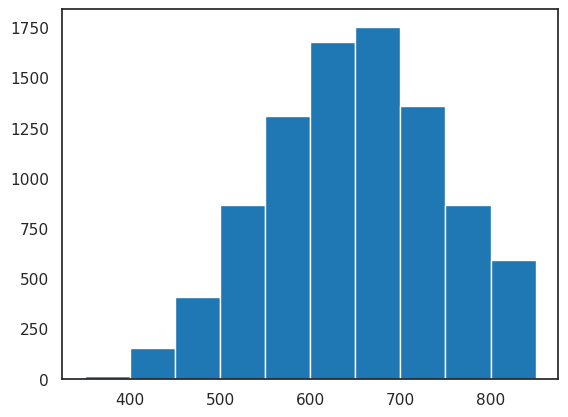

In [32]:
plt.hist(df['CreditScore'])

In [33]:
df.get_column_mean('CreditScore')

650.1335555555555

In [34]:
df.get_column_stdev('CreditScore')

96.81297216672871

We can also check the **sum** of a column for example 'balance':


In [35]:
df.get_column_sum('Balance')

687842630.7

### Combined expectations suite & future data validation

Last, we can **combine** the `Great Expectations` content above into a **whole suite** for the future dataset check before your putting them in your model:


In [36]:
my_expectations = df.get_expectation_suite()
my_expectations

{
  "expectations": [
    {
      "kwargs": {
        "column": "Exited"
      },
      "expectation_type": "expect_column_to_exist",
      "meta": {}
    },
    {
      "kwargs": {
        "column": "Exited"
      },
      "expectation_type": "expect_column_values_to_not_be_null",
      "meta": {}
    },
    {
      "kwargs": {
        "column": "Surname",
        "type_": "str"
      },
      "expectation_type": "expect_column_values_to_be_of_type",
      "meta": {}
    },
    {
      "kwargs": {
        "column": "HasCrCard",
        "value_set": [
          0,
          1
        ]
      },
      "expectation_type": "expect_column_values_to_be_in_set",
      "meta": {}
    },
    {
      "kwargs": {
        "column": "Geography",
        "value_set": [
          "Spain",
          "Germany",
          "France"
        ]
      },
      "expectation_type": "expect_column_distinct_values_to_be_in_set",
      "meta": {}
    },
    {
      "kwargs": {
        "column": "Gender",
       

The get_expectation_suite will store the Expectations those we used above.

But here is a important things to be noticed:

1. The expectations' **input settings**, like the value for 'mostly' are the **same as the original** settings.

2. By default, **The expecations that the original dataset failed will not be stored here.** For example, the name string check `df.expect_column_values_to_match_regex('Surname', '[A-Z][a-z]')` failed for the original dataset, Thus, it's **not included** here.


But you can manually change that by change the input of `discard_failed_expectations` to false:


In [37]:
my_expectations_false_included = df.get_expectation_suite(discard_failed_expectations=False)
my_expectations_false_included

{
  "expectations": [
    {
      "kwargs": {
        "column": "Exited"
      },
      "expectation_type": "expect_column_to_exist",
      "meta": {}
    },
    {
      "kwargs": {
        "column": "not exist"
      },
      "expectation_type": "expect_column_to_exist",
      "meta": {}
    },
    {
      "kwargs": {
        "column": "Exited"
      },
      "expectation_type": "expect_column_values_to_not_be_null",
      "meta": {}
    },
    {
      "kwargs": {
        "column": "Surname",
        "type_": "str"
      },
      "expectation_type": "expect_column_values_to_be_of_type",
      "meta": {}
    },
    {
      "kwargs": {
        "column": "Surname",
        "regex": "[A-Z][a-z]"
      },
      "expectation_type": "expect_column_values_to_match_regex",
      "meta": {}
    },
    {
      "kwargs": {
        "column": "HasCrCard",
        "value_set": [
          0,
          1
        ]
      },
      "expectation_type": "expect_column_values_to_be_in_set",
      "meta": {

Then the failed expectations, like `df.expect_column_values_to_match_regex('Surname', '[A-Z][a-z]')` are also in the suite `my_expectations_false_included`


<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0J6EEN/images/1.png" width="40%">


We are saving the suite to do data validation for the future dataset with the same Expectations content.

Here is **how to apply the check suite** to another dataset:


_1. Similar to what we did above, import the file that that has testing dataset:_ 


In [38]:
df_test=gx.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0J6EEN/Dataset_test.csv")
df_test.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15723217,Cremonesi,616,France,Male,37,9,0.00,1,1,0,111312.96,0
1,2,15733111,Yeh,688,Spain,Male,32,6,124179.30,1,1,1,138759.15,0
2,3,15610727,Ch'in,605,France,Male,36,7,128829.25,1,1,0,190588.59,0
3,4,15792720,Martinez,676,France,Male,33,6,171490.78,1,0,0,79099.64,0
4,5,15723153,Wearing,708,Spain,Male,33,3,0.00,2,1,0,138613.21,0


_2. Applying the suite to the dataset using `validate`. The input `expectation_suite` is the one we saved above:_


In [39]:
results = df_test.validate(expectation_suite=my_expectations, only_return_failures=True)
results

{
  "evaluation_parameters": {},
  "meta": {
    "great_expectations_version": "0.16.13",
    "expectation_suite_name": "default",
    "run_id": {
      "run_time": "2023-12-26T17:59:31.532920+00:00",
      "run_name": null
    },
    "batch_kwargs": {
      "ge_batch_id": "814eb2e4-a418-11ee-86fa-be10735272b3"
    },
    "batch_markers": {},
    "batch_parameters": {},
    "validation_time": "20231226T175931.532669Z",
    "expectation_suite_meta": {
      "great_expectations_version": "0.16.13"
    }
  },
  "results": [],
  "success": true,
  "statistics": {
    "evaluated_expectations": 8,
    "successful_expectations": 8,
    "unsuccessful_expectations": 0,
    "success_percent": 100.0
  }
}

Similar to the single Expectation, the result of suite validation is also stored in a dictionary.

You can also find whether the validation pass for the new dataset by calling `'success'`:


In [40]:
results['success']

True

The whole expectations result could be output as a `json` file:


In [41]:
df_test.save_expectation_suite('expectations.json')

You could go the official website [https://great-expectations.readthedocs.io/en/latest/intro.html](https://great-expectations.readthedocs.io/en/latest/intro.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0J6EEN1429-2022-01-01) to see more instruction and advanced functions in `Great Expectations`.


# Exercises


### Exercise 1 - To be in set


Write the code to check if the column `IsActiveMember` only has binary values 0 and 1:


In [42]:
df.expect_column_distinct_values_to_be_in_set("IsActiveMember",[0,1])

{
  "result": {
    "observed_value": [
      0,
      1
    ],
    "element_count": 9000,
    "missing_count": null,
    "missing_percent": null
  },
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  },
  "meta": {},
  "success": true
}

### Exercise 2 - Mostly


Write the code to check if 95% of the column `Surname` contains only letters:


In [44]:
df.expect_column_values_to_match_regex('Surname', '[A-Z][a-z]', mostly=0.95)

{
  "result": {
    "element_count": 9000,
    "missing_count": 0,
    "missing_percent": 0.0,
    "unexpected_count": 135,
    "unexpected_percent": 1.5,
    "unexpected_percent_total": 1.5,
    "unexpected_percent_nonmissing": 1.5,
    "partial_unexpected_list": [
      "H?",
      "T'ien",
      "T'ang",
      "T'ang",
      "T'ao",
      "K'ung",
      "L?",
      "K'ung",
      "T'ang",
      "K'ung",
      "P'an",
      "P'eng",
      "T'ien",
      "Y?an",
      "L?",
      "Y?an",
      "L?",
      "H?",
      "T'an",
      "T'ao"
    ]
  },
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  },
  "meta": {},
  "success": true
}

### Exercise 3 - In between


Write the code to check if the values in the `EstimatedSalary` column are all in between **50000** and **200000**:


In [45]:
df.expect_column_mean_to_be_between('EstimatedSalary', min_value=50000, max_value=200000)

{
  "result": {
    "observed_value": 100201.47696444433,
    "element_count": 9000,
    "missing_count": null,
    "missing_percent": null
  },
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  },
  "meta": {},
  "success": true
}

Excellent! You now know how to use Great Expectations! Try applying it before your machine learning modeling next time!


<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0J6EEN/images/children_win_success_video_game_play_happy_notebooks_creative-764632.jpg%21d.jpeg" width="40%">


## Authors


[Junxing(J.C.) Chen](https://www.linkedin.com/in/junxing-chen-3591a4162/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0J6EEN1429-2022-01-01) is a Data Science in IBM with strong interests in machine learning and cutting-edge technologies.


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-01-08|0.1|J.C.(Junxing) Chen|Create Lab|
|2023-01-27|0.1|Roxanne Li|Reviewed and edited Lab|


Copyright © 2023 IBM Corporation. All rights reserved.
